In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from google.colab import files
uploaded=files.upload()

Saving Stroke prediction dataset.xlsx to Stroke prediction dataset.xlsx


In [8]:
import pandas as pd


df = pd.read_excel('Stroke prediction dataset.xlsx')

# You can now work with the dataframe for analysis and manipulation
print(df.head())  # Display the first few rows of the dataframe


   stroke   bmi   age  hypertens  heart_dis  glucose_level
0       1  36.6  67.0          0          1         228.69
1       1  25.0  61.0          0          0         202.21
2       1  32.5  80.0          0          1         105.92
3       1  34.4  49.0          0          0         171.23
4       1  24.0  79.0          1          0         174.12


In [11]:
df.info

<bound method DataFrame.info of      stroke   bmi    age  hypertens  heart_dis  glucose_level
0         1  36.6  67.00          0          1         228.69
1         1  25.0  61.00          0          0         202.21
2         1  32.5  80.00          0          1         105.92
3         1  34.4  49.00          0          0         171.23
4         1  24.0  79.00          1          0         174.12
..      ...   ...    ...        ...        ...            ...
994       0  24.6  50.00          0          0         124.45
995       0  18.9   1.40          0          0          90.51
996       0  16.3   0.24          0          0         118.87
997       0  31.8  55.00          0          0          56.42
998       0  21.0  29.00          0          0          73.67

[999 rows x 6 columns]>

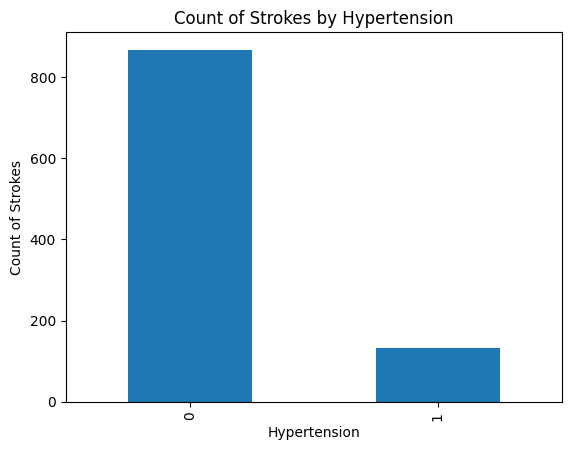

In [13]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a bar chart for the count of strokes by hypertension
df.groupby('hypertens')['stroke'].count().plot(kind='bar')
plt.xlabel('Hypertension')
plt.ylabel('Count of Strokes')
plt.title('Count of Strokes by Hypertension')
plt.show()


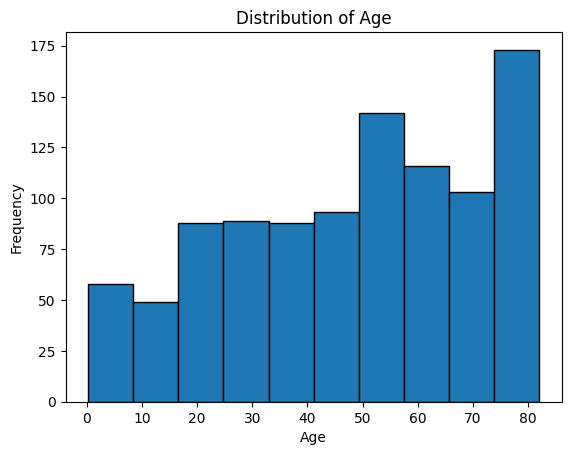

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a histogram for the distribution of ages
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


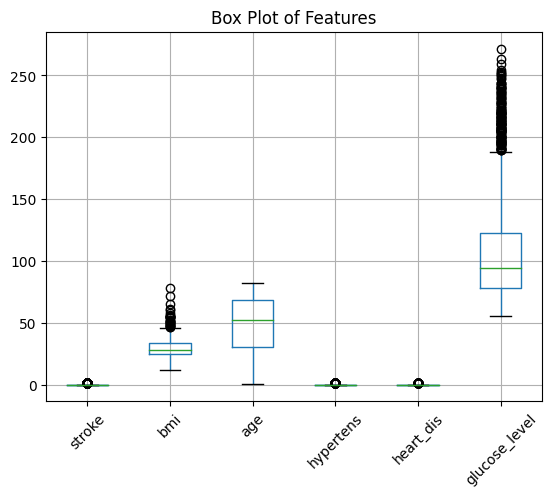

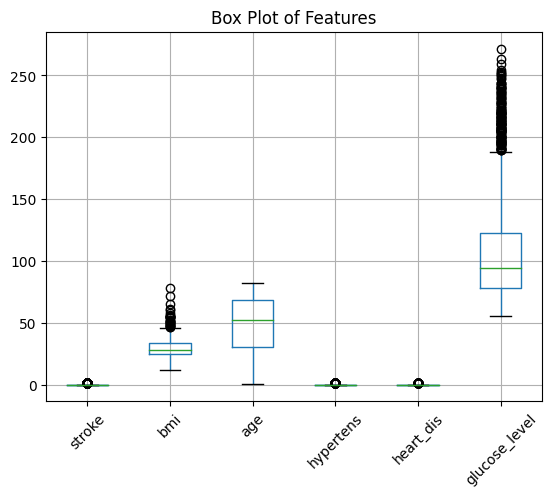

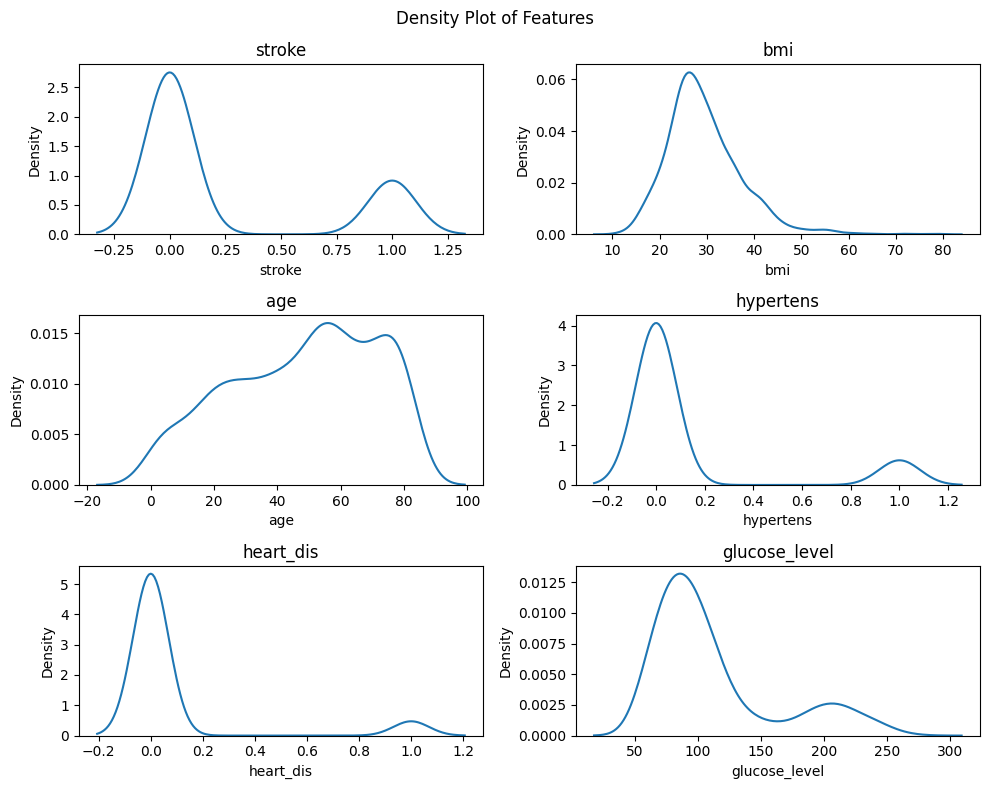

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

'

# Selecting the subset of features
features = ['stroke', 'bmi', 'age', 'hypertens', 'heart_dis', 'glucose_level']
subset_df = df[features]

# Creating a box plot for each feature
subset_df.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.show()

#Selecting the subset of features
features = ['stroke', 'bmi', 'age', 'hypertens', 'heart_dis', 'glucose_level']
subset_df = df[features]

# Creating a box plot for each feature
subset_df.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.show()

# Creating a density plot for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.suptitle('Density Plot of Features')

for i, col in enumerate(subset_df.columns):
    sns.kdeplot(data=subset_df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()





In [22]:
import pandas as pd



# Selecting the variables for measurement and prediction
dependent_variable = 'stroke'
independent_variables = ['bmi', 'age', 'hypertens', 'heart_dis', 'glucose_level']

# Separating the variables
measurement = df[dependent_variable]
prediction = df[independent_variables]


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Create a StandardScaler object
scaler = StandardScaler()


prediction_normalized = pd.DataFrame(scaler.fit_transform(prediction), columns=prediction.columns)


In [24]:
# Importing built-in ML packages
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.model_selection import KFold



# Selecting the variables for prediction
prediction_variables = ['bmi', 'age', 'hypertens', 'heart_dis', 'glucose_level']
X = df[prediction_variables]
y = df['stroke']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the classifiers
classifiers = [
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier()
]

# Evaluating the classifiers using k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for classifier in classifiers:
    accuracy_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    f1_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold, scoring='f1')
    auc_roc_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')
    recall_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold, scoring='recall')

    print(classifier.__class__.__name__)
    print("Accuracy:", accuracy_scores.mean())
    print("F1 Score:", f1_scores.mean())
    print("AUC-ROC Score:", auc_roc_scores.mean())
    print("Recall Score:", recall_scores.mean())
    print()


GaussianNB
Accuracy: 0.7583647798742138
F1 Score: 0.5135505245728235
AUC-ROC Score: 0.8295115346205894
Recall Score: 0.49195140068651133

RandomForestClassifier
Accuracy: 0.7834198113207547
F1 Score: 0.5526938280495439
AUC-ROC Score: 0.8319457119819862
Recall Score: 0.5153117382839447

AdaBoostClassifier
Accuracy: 0.7759827044025157
F1 Score: 0.539056356394665
AUC-ROC Score: 0.7989958242744197
Recall Score: 0.5061305904470965

GradientBoostingClassifier
Accuracy: 0.7934512578616353
F1 Score: 0.5650698694176954
AUC-ROC Score: 0.8416323643073197
Recall Score: 0.5161871586431994

SVC
Accuracy: 0.7646698113207548
F1 Score: 0.45960826111944586
AUC-ROC Score: 0.7993669005951605
Recall Score: 0.38974657894113374

DecisionTreeClassifier
Accuracy: 0.7358647798742137
F1 Score: 0.45905289909365277
AUC-ROC Score: 0.6423853195876876
Recall Score: 0.45175111944822666

LogisticRegression
Accuracy: 0.7909827044025157
F1 Score: 0.5642246296239949
AUC-ROC Score: 0.8408966794074282
Recall Score: 0.523663